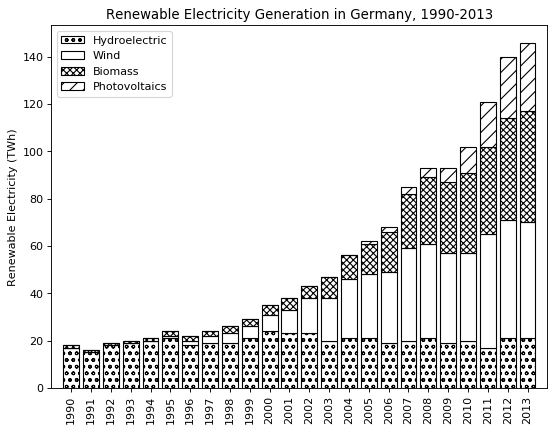

In [6]:
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt

url='https://scipython.com/static/media/examples/E7/germany-energy-sources.txt'
file = urlopen(url)
data = np.loadtxt(file, skiprows=2, dtype='i4')

years = data[:,0]
n = len(years)

# GWh to TWh
data[:,1:] = data[:,1:]/ 1000

fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
sources = ('Hydroelectric', 'Wind', 'Biomass', 'Photovoltaics')
hatch = ['oo', '', 'xxxx', '//']
bottom = np.zeros(n)
bars = [None]*n
for i, source in enumerate(sources):
    bars[i] = ax.bar(years, bottom=bottom, height=data[:,i+1], color='w', edgecolor='k',
                    hatch=hatch[i], align='center')
    bottom += data[:,i+1]

ax.set_xticks(years)
plt.xticks(rotation=90)
ax.set_xlim(1989, 2014)
ax.set_ylabel('Renewable Electricity (TWh)')
ax.set_title('Renewable Electricity Generation in Germany, 1990-2013')
plt.legend(bars, sources, loc='best')
plt.savefig('Renewable Electricity Generation in Germany.pdf')
plt.show()

some `pyplot` `bar` examples from https://matplotlib.org/gallery/statistics/barchart_demo.html

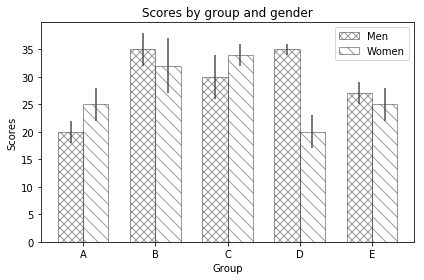

In [7]:
# Credit: Josh Hemann

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

# rects1 = ax.bar(index, means_men, bar_width,
#                 alpha=opacity, color='b',
#                 yerr=std_men, error_kw=error_config,
#                 label='Men')

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='w', edgecolor='k', hatch='xxx',
                yerr=std_men, error_kw=error_config,
                label='Men')

# rects2 = ax.bar(index + bar_width, means_women, bar_width,
#                 alpha=opacity, color='r',
#                 yerr=std_women, error_kw=error_config,
#                 label='Women')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='w', edgecolor='k', hatch='\\\\',
                yerr=std_women, error_kw=error_config,
                label='Women')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
ax.legend()

fig.tight_layout()
plt.show()

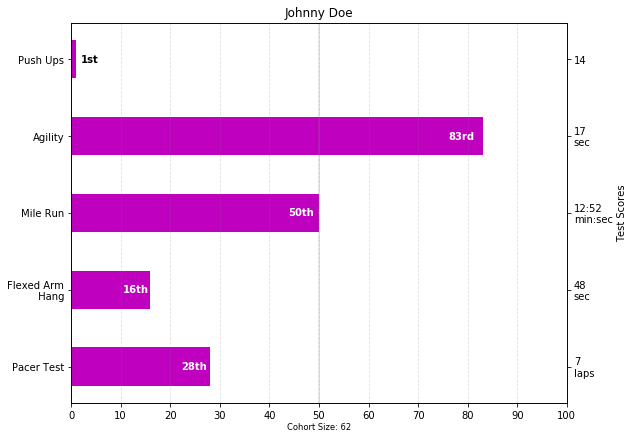

In [10]:
Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

# GLOBAL CONSTANTS
testNames = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility',
             'Push Ups']
testMeta = dict(zip(testNames, ['laps', 'sec', 'min:sec', 'sec', '']))


def attach_ordinal(num):
    """helper function to add ordinal string to integers

    1 -> 1st
    56 -> 56th
    """
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}

    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(scr, test):
    """
    Build up the score labels for the right Y-axis by first
    appending a carriage return to each string and then tacking on
    the appropriate meta information (i.e., 'laps' vs 'seconds'). We
    want the labels centered on the ticks, so if there is no meta
    info (like for pushups) then don't add the carriage return to
    the string
    """
    md = testMeta[test]
    if md:
        return '{0}\n{1}'.format(scr, md)
    else:
        return scr


def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(testNames):
        return ''
    else:
        return testNames[y]


def plot_student_results(student, scores, cohort_size):
    #  create the figure
    fig, ax1 = plt.subplots(figsize=(9, 7))
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(testNames))

    rects = ax1.barh(pos, [scores[k].percentile for k in testNames],
                     align='center',
                     height=0.5, color='m',
                     tick_label=testNames)

    ax1.set_title(student.name)

    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    # Plot a solid vertical gridline to highlight the median position
    ax1.axvline(50, color='grey', alpha=0.25)
    # set X-axis tick marks at the deciles
    cohort_label = ax1.text(.5, -.07, 'Cohort Size: {0}'.format(cohort_size),
                            horizontalalignment='center', size='small',
                            transform=ax1.transAxes)

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()

    scoreLabels = [format_score(scores[k].score, k) for k in testNames]

    # set the tick locations
    ax2.set_yticks(pos)
    # make sure that the limits are set equally on both yaxis so the
    # ticks line up
    ax2.set_ylim(ax1.get_ylim())

    # set the tick labels
    ax2.set_yticklabels(scoreLabels)

    ax2.set_ylabel('Test Scores')

    ax2.set_xlabel(('Percentile Ranking Across '
                    '{grade} Grade {gender}s').format(
                        grade=attach_ordinal(student.grade),
                        gender=student.gender.title()))

    rect_labels = []
    # Lastly, write in the ranking inside each bar to aid in interpretation
    for rect in rects:
        # Rectangle widths are already integer-valued but are floating
        # type, so it helps to remove the trailing decimal point and 0 by
        # converting width to int type
        width = int(rect.get_width())

        rankStr = attach_ordinal(width)
        # The bars aren't wide enough to print the ranking inside
        if width < 5:
            # Shift the text to the right side of the right edge
            xloc = width + 1
            # Black against white background
            clr = 'black'
            align = 'left'
        else:
            # Shift the text to the left side of the right edge
            xloc = 0.98*width
            # White on magenta
            clr = 'white'
            align = 'right'

        # Center the text vertically in the bar
        yloc = rect.get_y() + rect.get_height()/2.0
        label = ax1.text(xloc, yloc, rankStr, horizontalalignment=align,
                         verticalalignment='center', color=clr, weight='bold',
                         clip_on=True)
        rect_labels.append(label)

    # make the interactive mouse over give the bar title
    ax2.fmt_ydata = format_ycursor
    # return all of the artists created
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels,
            'cohort_label': cohort_label}

student = Student('Johnny Doe', 2, 'boy')
scores = dict(zip(testNames,
                  (Score(v, p) for v, p in
                   zip(['7', '48', '12:52', '17', '14'],
                       np.round(np.random.uniform(0, 1,
                                                  len(testNames))*100, 0)))))
cohort_size = 62  # The number of other 2nd grade boys

arts = plot_student_results(student, scores, cohort_size)
plt.show()

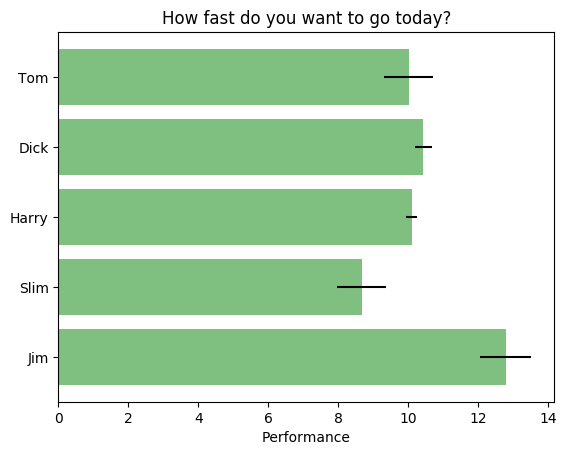

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', alpha=0.5, ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

In [4]:
!pip show matplotlib

Name: matplotlib
Version: 3.0.0
Summary: Python plotting package
Home-page: http://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: BSD
Location: /users/PLS0139/ysu0090/.local/lib/python3.6/site-packages
Requires: cycler, python-dateutil, numpy, kiwisolver, pyparsing
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
